In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


2025-07-27 10:03:30.170871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753610610.424390      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753610610.495655      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
base_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

val_generator = val_test_datagen.flow_from_directory(val_dir,
                                                     target_size=(150, 150),
                                                     batch_size=32,
                                                     class_mode='binary')

test_generator = val_test_datagen.flow_from_directory(test_dir,
                                                      target_size=(150, 150),
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      shuffle=False)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


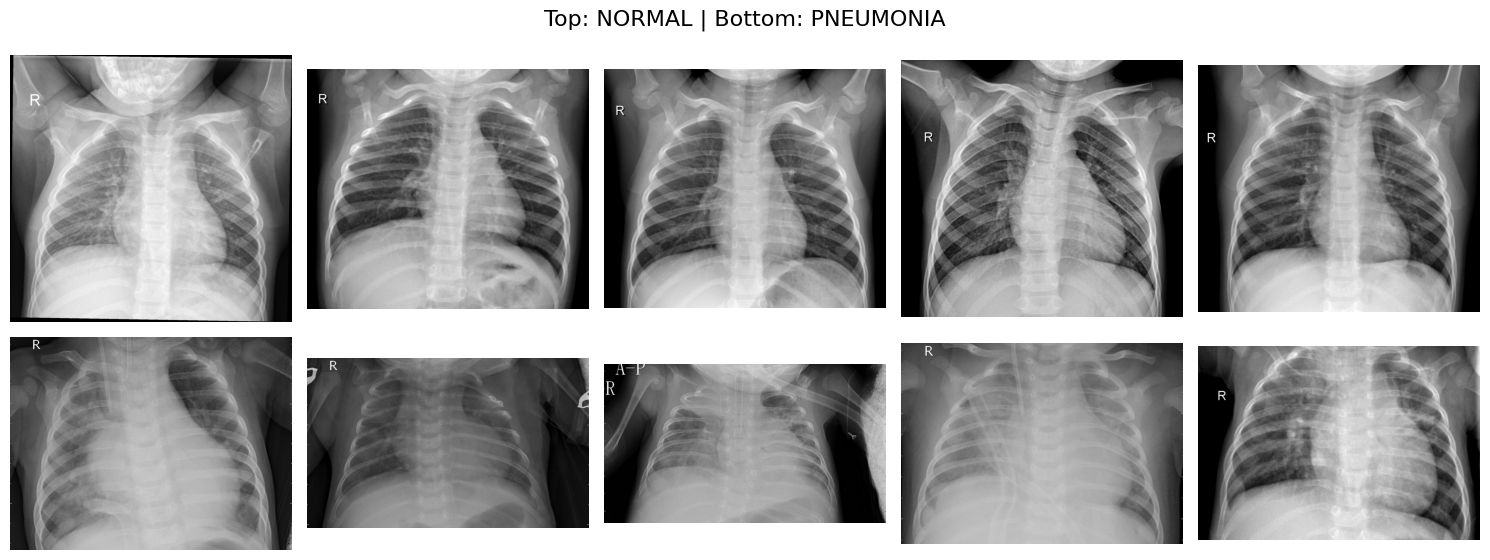

In [23]:
import random

import matplotlib.image as mpimg

normal_path = os.path.join(train_dir, 'NORMAL')
pneumonia_path = os.path.join(train_dir, 'PNEUMONIA')

normal_images = random.sample(os.listdir(normal_path), 5)
pneumonia_images = random.sample(os.listdir(pneumonia_path), 5)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Top: NORMAL | Bottom: PNEUMONIA', fontsize=16)

for i in range(5):
    # Normal
    img = mpimg.imread(os.path.join(normal_path, normal_images[i]))
    axes[0, i].imshow(img, cmap='gray')
    axes[0, i].axis('off')
    # Pneumonia
    img = mpimg.imread(os.path.join(pneumonia_path, pneumonia_images[i]))
    axes[1, i].imshow(img, cmap='gray')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-27 10:04:12.192091: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.7717 - loss: 0.5125 - val_accuracy: 0.8125 - val_loss: 0.4681
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.8668 - loss: 0.3110 - val_accuracy: 0.8125 - val_loss: 0.6421
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.8946 - loss: 0.2608 - val_accuracy: 0.8125 - val_loss: 0.6590
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.9080 - loss: 0.2311 - val_accuracy: 0.7500 - val_loss: 0.7779
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.9198 - loss: 0.1946 - val_accuracy: 0.6875 - val_loss: 0.7537
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.9161 - loss: 0.2065 - val_accuracy: 0.6250 - val_loss: 1.2932
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.9392 - loss: 0.1778 - val_accuracy: 0.6875 - val_loss: 0.9421
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.9405 - loss: 0.1513 - val_accu

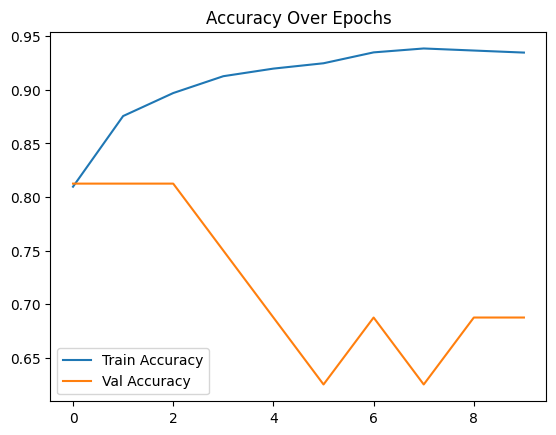

20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 558ms/step


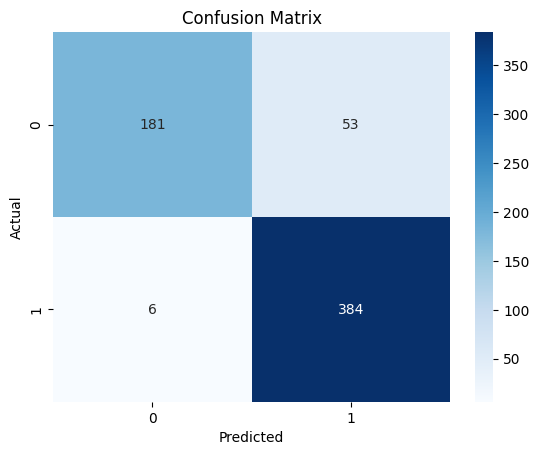

              precision    recall  f1-score   support

      NORMAL       0.97      0.77      0.86       234
   PNEUMONIA       0.88      0.98      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.88      0.89       624
weighted avg       0.91      0.91      0.90       624



In [11]:
# Accuracy & loss plots
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Confusion Matrix
pred = model.predict(test_generator)
pred_labels = (pred > 0.5).astype(int)

true_labels = test_generator.classes
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(true_labels, pred_labels, target_names=['NORMAL', 'PNEUMONIA']))


In [12]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout


#   VGG16 Base

In [13]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze base layers
for layer in vgg_base.layers:
    layer.trainable = False


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
x = vgg_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

vgg_model = Model(inputs=vgg_base.input, outputs=predictions)
vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
vgg_history = vgg_model.fit(train_generator,
                            validation_data=val_generator,
                            epochs=10)


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 682s 4s/step - accuracy: 0.7360 - loss: 0.5232 - val_accuracy: 0.7500 - val_loss: 0.5250
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 678s 4s/step - accuracy: 0.8955 - loss: 0.2624 - val_accuracy: 0.8125 - val_loss: 0.3770
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 679s 4s/step - accuracy: 0.8982 - loss: 0.2388 - val_accuracy: 0.7500 - val_loss: 0.5009
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 677s 4s/step - accuracy: 0.9092 - loss: 0.2097 - val_accuracy: 0.7500 - val_loss: 0.5372
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 683s 4s/step - accuracy: 0.9169 - loss: 0.2072 - val_accuracy: 0.7500 - val_loss: 0.4729
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 680s 4s/step - accuracy: 0.9258 - loss: 0.1932 - val_accuracy: 0.6875 - val_loss: 0.6047
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 684s 4s/step - accuracy: 0.9241 - loss: 0.1835 - val_accuracy: 0.8125 - val_loss: 0.3420
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 677s 4s/step - accuracy: 0.9198 - loss: 0.1798 - val_accu

# Evaluate VGG16 Model

20/20 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step
VGG16 Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.92      0.79      0.85       234
   PNEUMONIA       0.89      0.96      0.92       390

    accuracy                           0.90       624
   macro avg       0.90      0.88      0.89       624
weighted avg       0.90      0.90      0.89       624



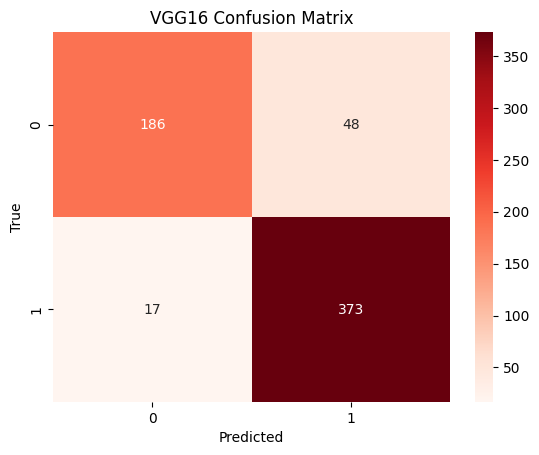

In [18]:
vgg_pred = vgg_model.predict(test_generator)
vgg_pred_labels = (vgg_pred > 0.5).astype(int)

# VGG confusion matrix and report
print("VGG16 Classification Report:")
print(classification_report(test_generator.classes, vgg_pred_labels, target_names=['NORMAL', 'PNEUMONIA']))

cm_vgg = confusion_matrix(test_generator.classes, vgg_pred_labels)
sns.heatmap(cm_vgg, annot=True, fmt='d', cmap='Reds')
plt.title("VGG16 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Accuracy Comparison Over Epochs

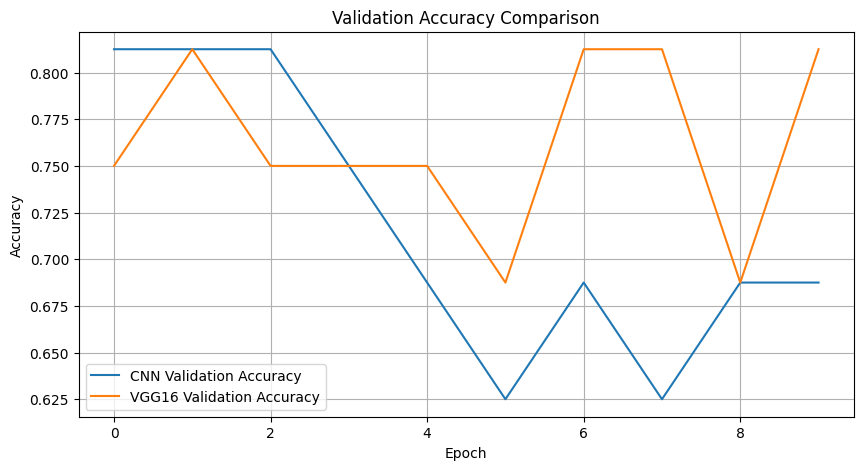

In [19]:
# Accuracy comparison plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='VGG16 Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [20]:
from sklearn.metrics import classification_report

print("=== CNN Classification Report ===")
cnn_pred = model.predict(test_generator)
cnn_pred_labels = (cnn_pred > 0.5).astype(int)
print(classification_report(test_generator.classes, cnn_pred_labels, target_names=['NORMAL', 'PNEUMONIA']))

print("=== VGG16 Classification Report ===")
vgg_pred = vgg_model.predict(test_generator)
vgg_pred_labels = (vgg_pred > 0.5).astype(int)
print(classification_report(test_generator.classes, vgg_pred_labels, target_names=['NORMAL', 'PNEUMONIA']))


=== CNN Classification Report ===
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 433ms/step
              precision    recall  f1-score   support

      NORMAL       0.97      0.77      0.86       234
   PNEUMONIA       0.88      0.98      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.88      0.89       624
weighted avg       0.91      0.91      0.90       624

=== VGG16 Classification Report ===
20/20 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step
              precision    recall  f1-score   support

      NORMAL       0.92      0.79      0.85       234
   PNEUMONIA       0.89      0.96      0.92       390

    accuracy                           0.90       624
   macro avg       0.90      0.88      0.89       624
weighted avg       0.90      0.90      0.89       624



# Confusion Matrices Side by Side

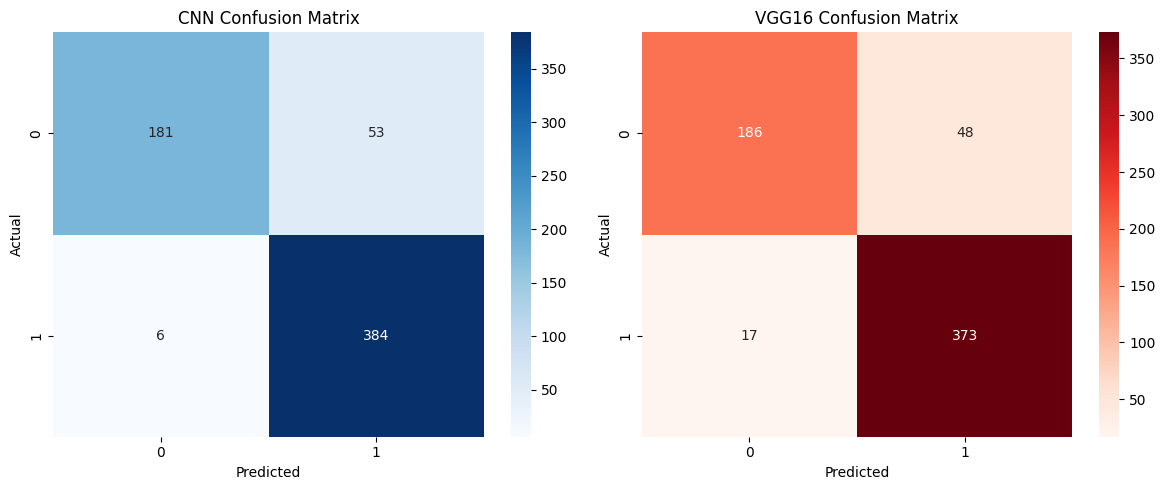

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# CNN Confusion Matrix
cm_cnn = confusion_matrix(test_generator.classes, cnn_pred_labels)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("CNN Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# VGG16 Confusion Matrix
cm_vgg = confusion_matrix(test_generator.classes, vgg_pred_labels)
sns.heatmap(cm_vgg, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title("VGG16 Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


# Accuracy Summary Table

In [22]:
cnn_acc = history.history['val_accuracy'][-1]
vgg_acc = vgg_history.history['val_accuracy'][-1]

print("📊 Final Validation Accuracy Comparison")
print(f"🧠 CNN Model Accuracy:     {cnn_acc:.4f}")
print(f"🧠 VGG16 Model Accuracy:   {vgg_acc:.4f}")


📊 Final Validation Accuracy Comparison
🧠 CNN Model Accuracy:     0.6875
🧠 VGG16 Model Accuracy:   0.8125


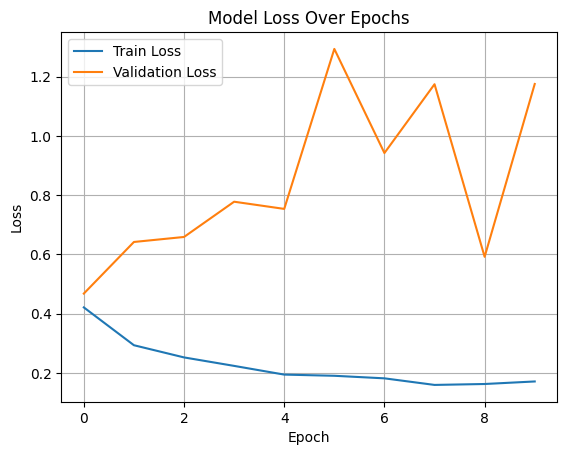

In [24]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


# Misclassified Images

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 459ms/step


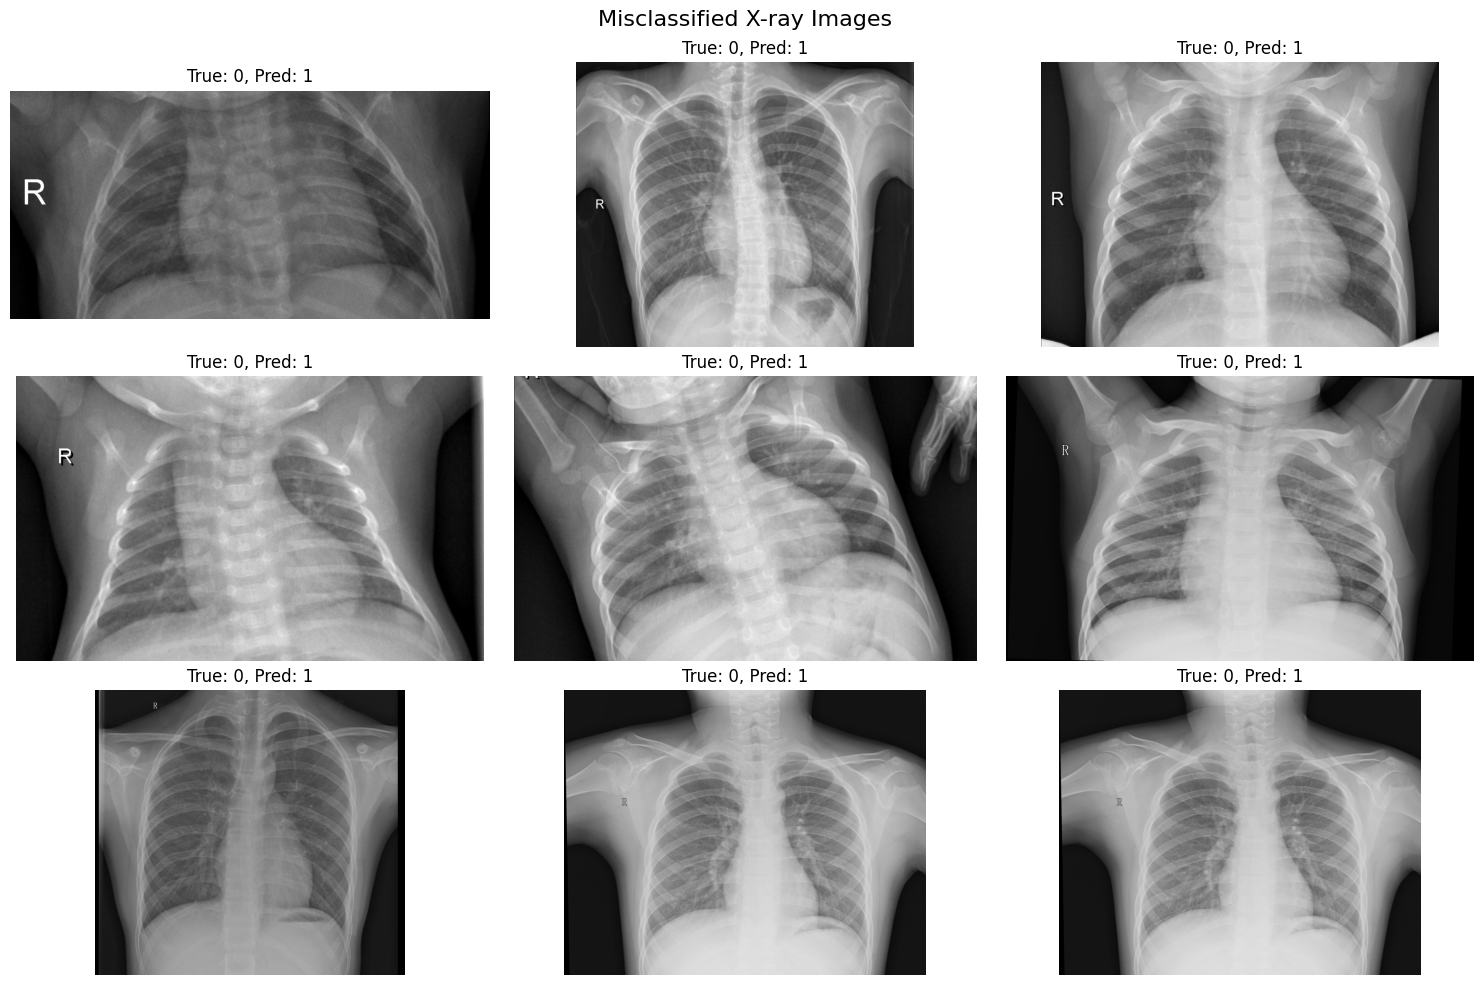

In [25]:
import numpy as np

predicted = (model.predict(test_generator) > 0.5).astype(int).flatten()
true = test_generator.classes
filenames = test_generator.filenames

misclassified_indices = np.where(predicted != true)[0]

plt.figure(figsize=(15, 10))
for i, idx in enumerate(misclassified_indices[:9]):
    img_path = os.path.join(test_dir, filenames[idx])
    img = mpimg.imread(img_path)
    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true[idx]}, Pred: {predicted[idx]}")
    plt.axis('off')
plt.suptitle("Misclassified X-ray Images", fontsize=16)
plt.tight_layout()
plt.show()


#  Correctly Classified Images

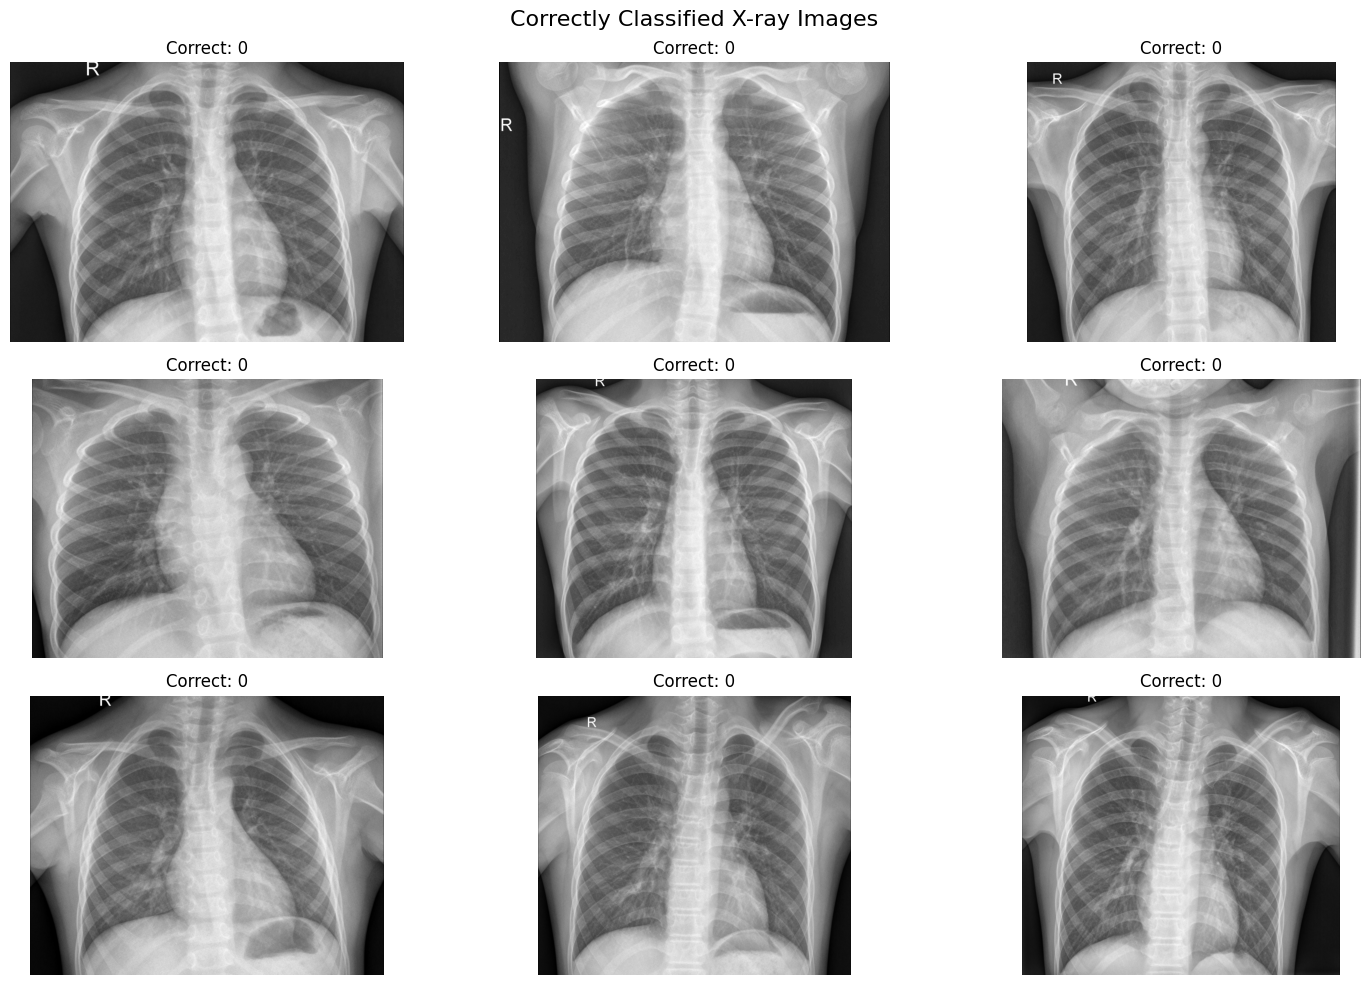

In [26]:
correct_indices = np.where(predicted == true)[0]

plt.figure(figsize=(15, 10))
for i, idx in enumerate(correct_indices[:9]):
    img_path = os.path.join(test_dir, filenames[idx])
    img = mpimg.imread(img_path)
    plt.subplot(3, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Correct: {true[idx]}")
    plt.axis('off')
plt.suptitle("Correctly Classified X-ray Images", fontsize=16)
plt.tight_layout()
plt.show()
